In [1]:
# ! pip install networkx
# ! pip install gensim

# ! pip install scikit-learn

# ! pip install matplotlib
# ! pip install numpy
# ! pip install pandas
# ! pip install tqdm

In [2]:
import networkx as nx

import matplotlib.pyplot as plt
# %:magic function
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

import numpy as np
import pandas as pd
import random
from tqdm import tqdm

https://densitydesign.github.io/strumentalia-seealsology

https://en.wikipedia.org/wiki/Ren%C3%A9_Descartes
    31 03 1596 – 11 02 1650

https://en.wikipedia.org/wiki/Immanuel_Kant
    22 04 1724 – 12 02 1804

https://en.wikipedia.org/wiki/Georg_Wilhelm_Friedrich_Hegel
    27 08 1770 – 14 11 1831

https://en.wikipedia.org/wiki/Arthur_Schopenhauer
    22 02 1788 – 21 09 1860

https://en.wikipedia.org/wiki/Karl_Marx
    05 05 1818 – 14 03 1883

https://en.wikipedia.org/wiki/Sigmund_Freud
    06 05 1856 – 23 09 1939

https://en.wikipedia.org/wiki/Ayn_Rand
    02 02 1905 – 06 03 1982

In [3]:
df = pd.read_csv("seealsology-data.tsv", sep="\t")
df.shape  # (6935, 3)
# df.head()

(6935, 3)

In [4]:
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())
len(G)  # 4865
all_nodes = list(G.nodes())
# all_nodes

In [5]:
def get_randomwalk(node, path_length) :

    random_walk = [node]

    for i in range(path_length - 1) :

        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))  # set，无序不重复元素集
        # 当前节点的未访问过的邻居
        if len(temp) == 0 :
            break

        next_node = random.choice(temp)
        random_walk.append(next_node)
        node = next_node

    return random_walk

#
get_randomwalk('sigmund freud', 6)

['sigmund freud', 'histrionic personality disorder']

In [6]:
random_walks = []
r = 20
l = 6

for n in tqdm(all_nodes) :
    for i in range(r) :
        random_walks.append(get_randomwalk(n, l))

#
len(random_walks)
# random_walks[1]

100%|█████████████████████████████████████| 4865/4865 [00:00<00:00, 9032.04it/s]


97300

In [7]:
from gensim.models import Word2Vec
model = Word2Vec(
                 vector_size=48,  # Embedding维数
                 window=3,  # 窗口宽度
                 sg=1,  # Skip-Gram
                 hs=0,  # 不加分层softmax
                 negative=10,  # 负采样
                 alpha=0.03,  # 初始学习率
                 min_alpha=0.0007,  # 最小学习率
                 seed=14  # 随机数种子
                )

model.build_vocab(random_walks, progress_per=2)
model.train(random_walks, total_examples=model.corpus_count, epochs=200, report_delay=1)
model.wv.get_vector('sigmund freud').shape
model.wv.get_vector('sigmund freud')
model.wv.similar_by_word('sigmund freud')

[('saul rosenzweig', 0.8966267704963684),
 ('freudian slip', 0.8955014944076538),
 ('school of brentano', 0.8951494097709656),
 ('narcissism of small differences', 0.893471896648407),
 ('afterwardsness', 0.891762375831604),
 ('the standard edition of the complete psychological works of sigmund freud',
  0.8911174535751343),
 ('psychoanalytic literary criticism', 0.8906273245811462),
 ('histrionic personality disorder', 0.8902713656425476),
 ('hidden personality', 0.8879811763763428),
 ('a clinical lesson at the salpêtrière', 0.8877609968185425)]

In [8]:
X = model.wv.vectors

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

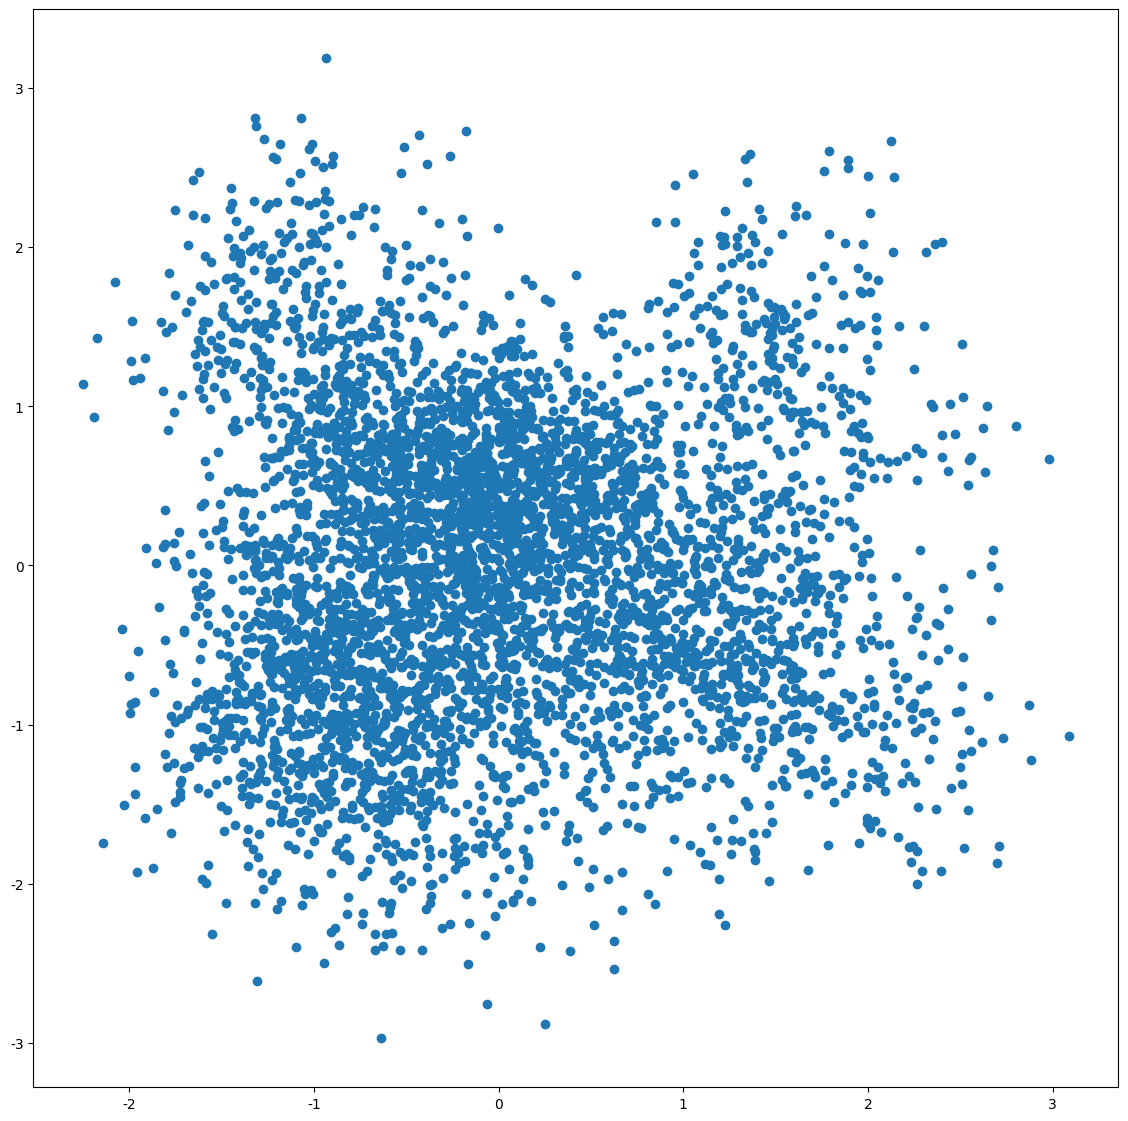

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

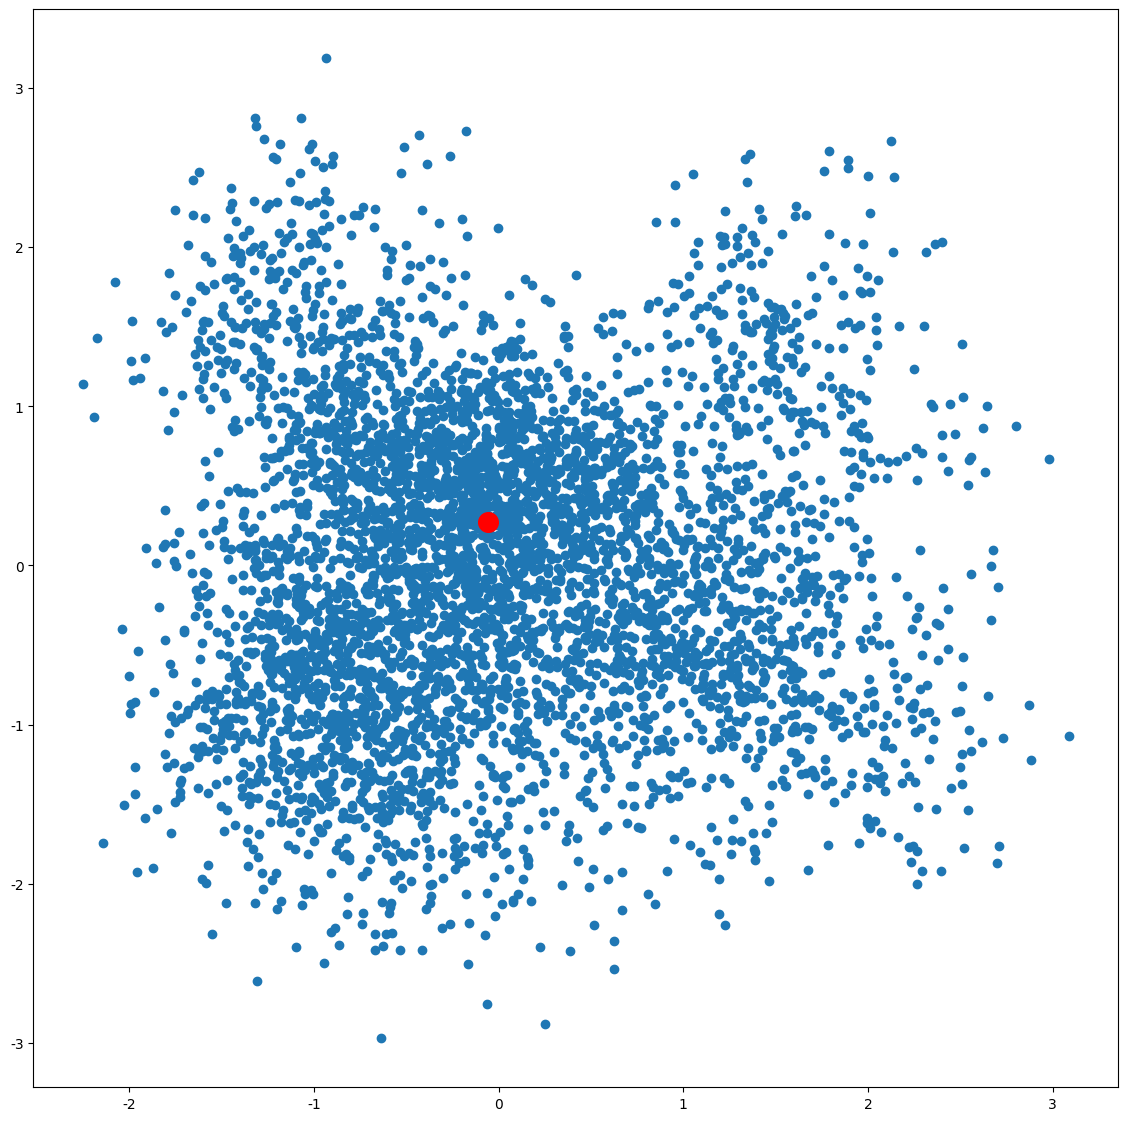

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embed_2d = pca.fit_transform(X)
embed_2d.shape

plt.figure(figsize=(14, 14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

term = 'sigmund freud'
term_xd = model.wv[term].reshape(1, -1)
# term_xd.shape  # (1, 48)

term_2d = pca.transform(term_xd)
# term_2d

plt.figure(figsize=(14, 14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.scatter(term_2d[:, 0], term_2d[:, 1], c='r', s=200)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

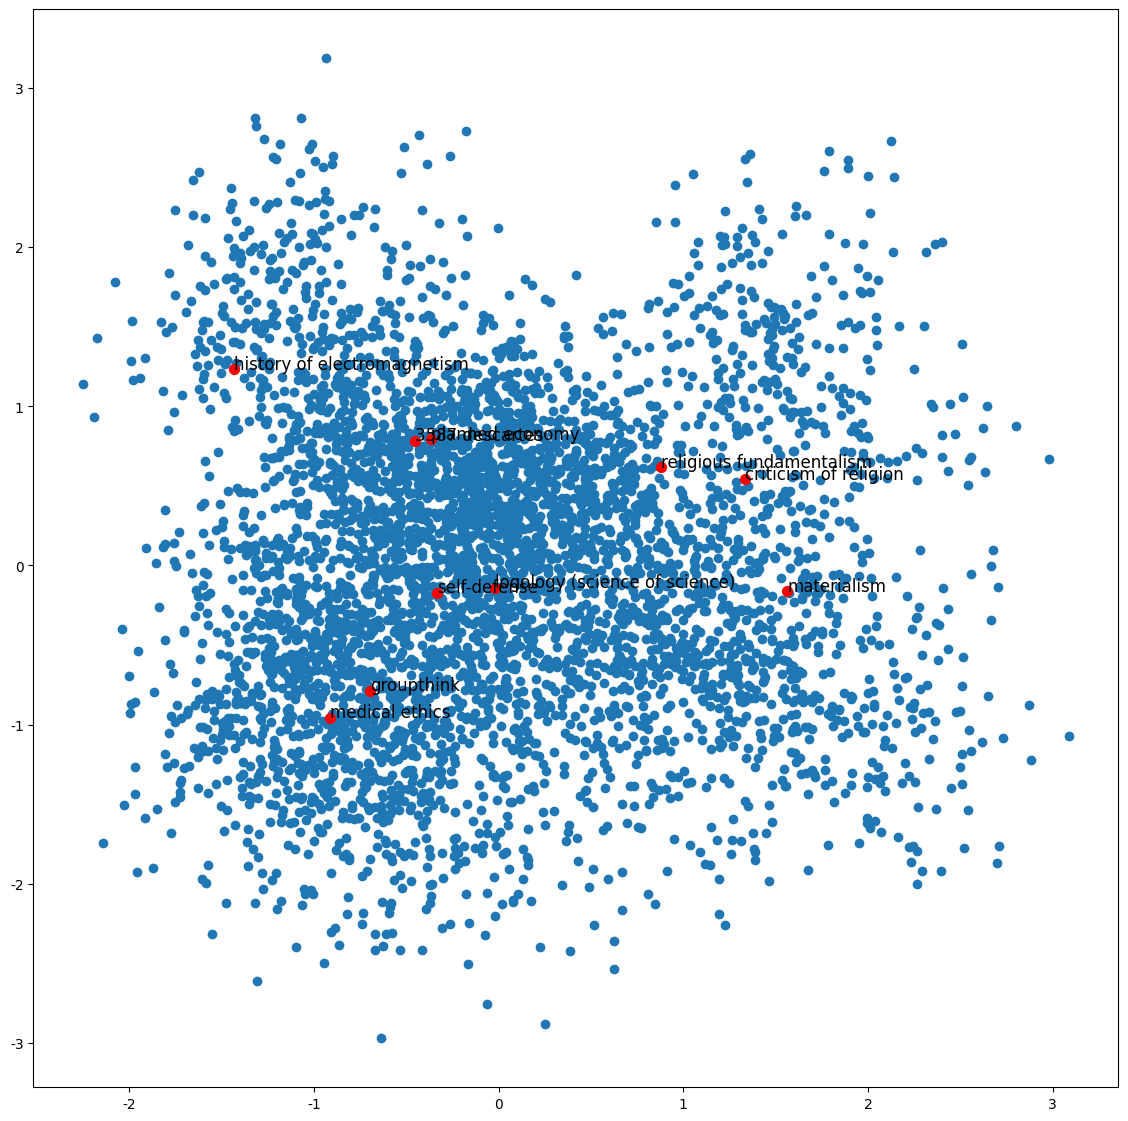

In [10]:
pagerank = nx.pagerank(G)
node_importance = sorted(pagerank.items(), key=lambda x:x[1], reverse=True)

n = 10
terms_chosen = []
for each in node_importance[:n] :
    terms_chosen.append(each[0])
# terms_chosen.extend(['computer vision', 'deep learning'])
terms_chosen

# 词典中词条的索引号
term2index = model.wv.key_to_index
# term_index = np.array(term2index.values())
# index2term = model.wv.index_to_key

plt.figure(figsize=(14, 14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])

for item in terms_chosen :
    idx = term2index[item]
    plt.scatter(embed_2d[idx, 0], embed_2d[idx, 1], c='r', s=50)
    plt.annotate(item, xy=(embed_2d[idx, 0], embed_2d[idx, 1]), c='k', fontsize=12)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

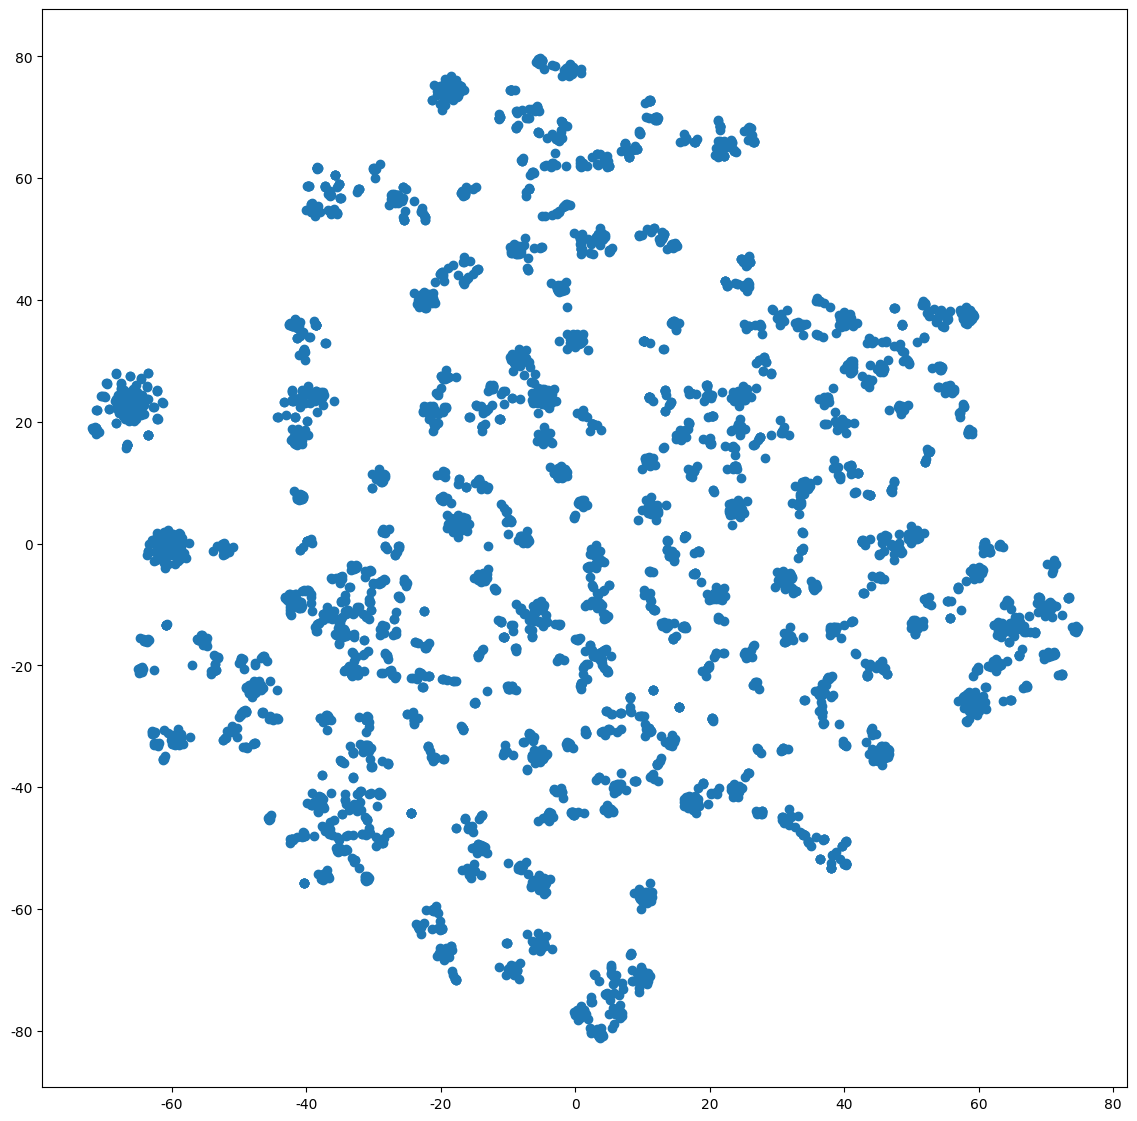

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

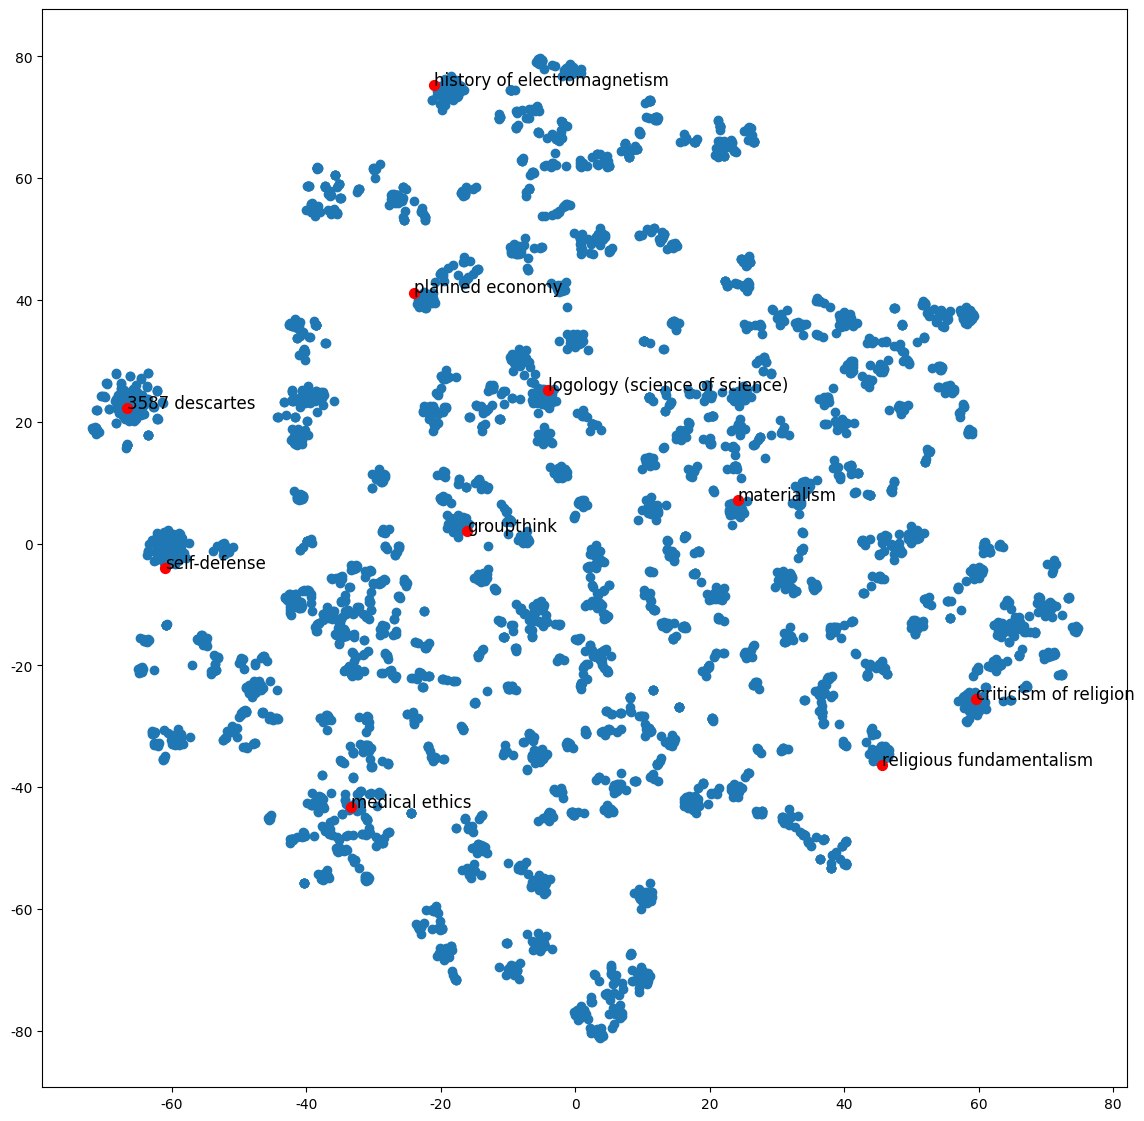

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)
embed_2d = tsne.fit_transform(X)

plt.figure(figsize=(14, 14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

#
plt.figure(figsize=(14, 14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])

for item in terms_chosen :
    idx = term2index[item]
    plt.scatter(embed_2d[idx, 0], embed_2d[idx, 1], c='r', s=50)
    plt.annotate(item, xy=(embed_2d[idx, 0], embed_2d[idx, 1]), c='k', fontsize=12)
plt.show()

In [12]:
terms_chosen_mask = np.zeros(X.shape[0])
for item in terms_chosen :
    idx = term2index[item]
    terms_chosen_mask[idx] = 1

df = pd.DataFrame()
df['X'] = embed_2d[:, 0]
df['Y'] = embed_2d[:, 1]
df['item'] = model.wv.index_to_key
df['pagerank'] = pagerank.values()
df['chosen'] = terms_chosen_mask

df.to_csv('tsne_vis_2d.csv', index=False)

df

,X,Y,item,pagerank,chosen
0,-66.643661,22.260607,3587 descartes,0.001974,1.0
1,-61.015209,-4.005270,self-defense,0.000117,1.0
2,-33.381523,-43.315857,medical ethics,0.000117,1.0
3,59.585732,-25.588223,criticism of religion,0.000117,1.0
4,-3.986851,25.169483,logology (science of science),0.000117,1.0
...,...,...,...,...,...
4860,-37.774616,24.963243,u15 group of canadian research universities,0.000101,0.0
4861,-42.468582,-9.420802,french language in the united states,0.000101,0.0
4862,-42.529125,-8.268660,euthanasia in the united states,0.000096,0.0
4863,-55.565777,-15.961629,we are all keynesians now,0.000096,0.0


In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=1000)
embed_3d = tsne.fit_transform(X)

df = pd.DataFrame()
df['X'] = embed_3d[:, 0]
df['Y'] = embed_3d[:, 1]
df['Z'] = embed_3d[:, 2]
df['item'] = model.wv.index_to_key
df['pagerank'] = pagerank.values()
df['chosen'] = terms_chosen_mask

df.to_csv('tsne_vis_3d.csv', index=False)

df

,X,Y,Z,item,pagerank,chosen
0,-19.095417,8.529474,-5.413935,3587 descartes,0.001974,1.0
1,-19.411201,-1.477878,-12.545775,self-defense,0.000117,1.0
2,-8.179146,-17.617195,7.887691,medical ethics,0.000117,1.0
3,21.207869,-8.673785,-5.311957,criticism of religion,0.000117,1.0
4,1.819481,11.955857,-11.911108,logology (science of science),0.000117,1.0
...,...,...,...,...,...,...
4860,-19.036083,10.120519,11.042909,u15 group of canadian research universities,0.000101,0.0
4861,-13.771638,-5.710464,14.751105,french language in the united states,0.000101,0.0
4862,-14.611078,-4.765306,15.064616,euthanasia in the united states,0.000096,0.0
4863,-19.546194,-2.786059,-2.528265,we are all keynesians now,0.000096,0.0


In [14]:
# echarts的3d可视化